### Problem 3

**Language: Matlab**


Consider the first three links of the Puma 560

`x=c1a2c2+a3c23-d4s23 -d3s1`

`y=s1a2c2+a3c23-d4s23 +d3c1`

`z=-a3s23-a2s2-d4c23`

Where the parameters are the following: 

`a2=d4=0.432, a3=+0.203, d3=+0.093`

First find the Jacobian matrix, and then the manipulators singularities. 

Find the locus of singularities in (t1,t2,t3) in the joint space, and plot them.  Use the following joint ranges for plotting: 

`t1=(-160 to+160), t2=(-215 to+35), t3=(-45 to+225)`

Use Matlab to do this problem.


NOTE: all outputs have been suppressed to save space. To see the output of any step, remove the semicolon from the line you'd like to see

In [28]:
% define symbolic variables
syms a2 a3 d3 d4 t1 t2 t3

% define forward kinematic equations
fx = (cos(t1)*((a2*cos(t2))+(a3*cos(t2+t3))-(d4*sin(t2+t3))))-(d3*sin(t1));
fy = (sin(t1)*((a2*cos(t2))+(a3*cos(t2+t3))-(d4*sin(t2+t3))))+(d3*cos(t1));
fz = (-a3*sin(t2+t3))-(a2*sin(t2))-(d4*cos(t2+t3));

In [36]:
% compute the jacobian of the
% forward kinematic equations
jacobian = [
    [diff(fx, t1), diff(fx, t2), diff(fx, t3)],
    [diff(fy, t1), diff(fy, t2), diff(fy, t3)],
    [diff(fz, t1), diff(fz, t2), diff(fz, t3)]
];

% find the determinate of
% the jacobian matrix
jacobain_determinate = simplify(det(jacobian));

% substitute in known values
keys = [a2, a3, d3, d4];
values = [ 0.432, 0.203, 0.093, 0.432 ];
jacobain_determinate = subs(jacobain_determinate, keys, values);

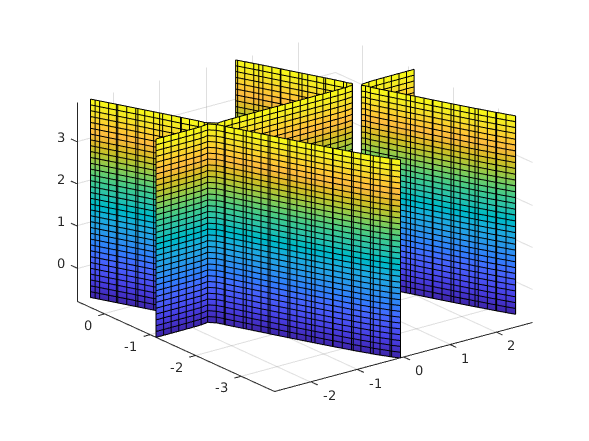

In [37]:
% implicitly plot the singularities
limits = deg2rad([-160, 160, -215, 35, -45, 225]);
fimplicit3(jacobain_determinate==0, limits)